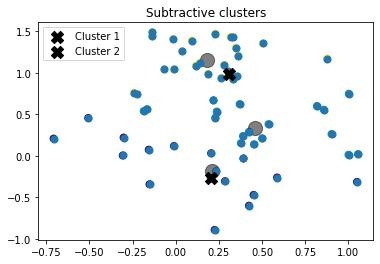

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 29 10:54:56 2019

@author: steve
"""

import math
import pandas as pd
import numpy as np
import numpy.random as random 
import matplotlib.pyplot as plt

#建立substractive clustering algorithm
#以下的code是根據 https://github.com/bhaveshkumarraj/Subtractive-Clustering-Algorithm/blob/master/code.py 去改寫
def substractive_clustering_algorithm(input_data,ra,rb,Eup,Edown):
    cluster_center = []
    size = len(input_data)
    potential = [0.0] * size
    for i in range(size):
        Xi = input_data[i]
        for j in range(i + 1, size):
            Xj = input_data[j]
            value = np.exp(-4* ((Xi[0] - Xj[0]) ** 2 + (Xi[1] - Xj[1]) ** 2 ) / (ra / 2) ** 2)
            potential[i] += value
            potential[j] += value
    max_potential_value = max(potential)  # p1
    max_potential_index = potential.index(max_potential_value)
    
    # filter through accept and reject criteria
    current_max_value = max_potential_value
    criteria = 1
    while criteria and current_max_value:
        criteria = 0
        max_potential_vector = input_data[max_potential_index]  # x1
        potential_ratio = current_max_value / max_potential_value  # Pk and MaxPValue
    
        if potential_ratio > Eup:
            criteria = 1
        elif potential_ratio > Edown:
            dmin = np.min([(max_potential_vector[0] - cc[0]) ** 2 + (max_potential_vector[1] - cc[1]) ** 2 for cc in cluster_center])
            if ((dmin / ra) + potential_ratio) >= 1:
                criteria = 1
            else:
                criteria = 2
        elif potential_ratio < Edown:
            break
    
        if criteria == 1:
            cluster_center.append(max_potential_vector)
            for i in range(size):
                Xj = input_data[i]
                potential_value = potential[i]
                potential_value = potential_value - (current_max_value * np.exp(-4*
                                                    ((max_potential_vector[0] - Xj[0]) ** 2 +
                                                    (max_potential_vector[1] - Xj[1]) ** 2 )) / (rb / 2) ** 2)
                if potential_value < 0:
                    potential_value = 0
                potential[i] = potential_value
            current_max_value = max(potential)  # p1
            max_potential_index = potential.index(current_max_value)
        elif criteria == 2:
            potential[max_potential_index] = 0
            current_max_value = max(potential)  # p1
            max_potential_index = potential.index(current_max_value)
            
    return cluster_center

#輸入資料之函數
def x1(a1,b1):
    x1=math.sin(a1)*math.cos(b1)
    return x1

def y1(a1,b1):
    y1=math.sin(a1)*math.sin(b1)
    return y1

def x2(a2,b2):
    x2=math.sin(a2)*math.cos(b2)
    return x2

def y2(a2,b2):
    y2=math.sin(a2)*math.sin(b2)
    return y2

def x3(a3,b3):
    x3=math.sin(a3)*math.cos(b3)
    return x3

def y3(a3,b3):
    y3=math.sin(a3)*math.sin(b3)
    return y3

#原本上面定義的函數不接受array,通過vectorize便能夠輸入矩陣進入變數裏面
x1=np.vectorize(x1)
y1=np.vectorize(y1)
x2=np.vectorize(x2)
y2=np.vectorize(y2)
x3=np.vectorize(x3)
y3=np.vectorize(y3)

a1=-math.pi/4+(math.pi/2)*random.uniform(0,1,20)
b1=2*math.pi*random.uniform(0,1,20)
sdev1=0.6*random.uniform(0,1,20)
sdev2=0.6*random.uniform(0,1,20)
output1=x1(a1,b1)+sdev1
output2=y1(a1,b1)+sdev2

a2=(math.pi/4)+((2*math.pi)/4)*random.uniform(0,1,20)
b2=(-math.pi/2)+(math.pi)*random.uniform(1,20)
sdev3=0.6*random.uniform(0,1,20)
sdev4=0.6*random.uniform(0,1,20)
output3=x2(a2,b2)+sdev3
output4=y2(a2,b2)+sdev4

a3=(-math.pi/2)+((4*math.pi)/2)*random.uniform(0,1,20)
b3=(-math.pi/2)+(4*math.pi/4)*random.uniform(0,1,20)
sdev5=0.6*random.uniform(0,1,20)
sdev6=0.6*random.uniform(0,1,20)
output5=x3(a3,b3)+sdev5
output6=y3(a3,b3)+sdev6

X_1=np.hstack((output1,output3,output5))
X_2=np.hstack((output2,output4,output6))
x=np.vstack((X_1,X_2))
x=np.transpose(x)

#K-means classification
#接下來匯入KMeans函式庫
from sklearn.cluster import KMeans #安裝 k-means 套件方式: pip install sklearn
#請KMeans分成四類
clf = KMeans(n_clusters=3)
#開始訓練
clf.fit(x)
#分類結果
km_labels = clf.labels_ #分成哪一類
km_centers = clf.cluster_centers_ #四組分類的中心點

plt.scatter(x[:,0],x[:,1], c=km_labels,s=50,cmap='viridis')
plt.scatter(km_centers[:, 0], km_centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('K-means')
#plt.show()
#Fuzzy-C means classification
#接下來匯入Fuzzy C-Means函式庫
from fcmeans import FCM #安裝 fuzzy-c-means 套件方式: pip install fuzzy-c-means
#請KMeans分成四類
fcm = FCM(n_clusters=3)
#開始訓練
fcm.fit(x)
#分類結果
fcm_centers = fcm.centers #分成哪一類
fcm_labels  = fcm.u.argmax(axis=1) #四組分類的中心點
plt.scatter(x[:,0],x[:,1], c=fcm_labels,s=50,cmap='viridis')
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Fuzzy-c-means')

#Substractive clustering
ra = 0.45
rb = ra * 1.5
Eup = 0.5
Edown = 0.15
#套用在上方呼叫好的減法聚類函數
sub_center=substractive_clustering_algorithm(x,ra,rb,Eup,Edown)

plt.scatter(x[:,0],x[:,1],s=50,cmap='viridis')
for idx, centroid in enumerate(sub_center):
    plt.scatter(*centroid, c='k', s=150, marker='X',label='Cluster '+str(idx+1))
plt.title('Subtractive clusters')
plt.legend()
plt.show()
